In this notebook I will conduct some simple visualization of genes corresponding to the unfolded protein response.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt

In [2]:
#What kind of error/troubleshooitng to show
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header() #Header with software versions
sc.settings.set_figure_params(dpi=150, facecolor='white',dpi_save=300,color_map='cividis') #Not only is cividis colorblind 
#friendly it almost matches UM's maize and blue haha!

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.10 pynndescent==0.5.7


In [3]:
#Results file directory
results_file = '/home/lcorrea/Projects/Kurd_GEO/Scanpy_Objects/Kurd_D0toD8.h5ad' 

In [4]:
Data=sc.read_h5ad(results_file)

In [5]:
#Create a dictionary that contains the genes of interest grouped by "pathway"

marker_genes_dict = {
    'UPR': ['Xbp1', 'Atf4',"Ddit3","Atf6"],
    'ERAD': ['Sel1l', 'Syvn1'],
    'Effector_Molecules': ['Gzmb','Ifng','Il2'],
    'LineageTF': ['Tcf7', 'Prdm1','Bcl6','Tbx21'],
}


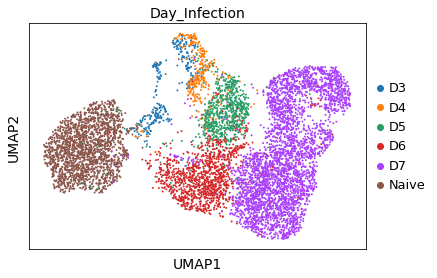

<Figure size 432x288 with 0 Axes>

In [6]:
#sorry d
sc.pl.umap(Data, color=['Day_Infection'])
plt.savefig("/home/lcorrea/Projects/Kurd_GEO/figures/UMAP_D8.tiff")

In the heatmap/matrixplot bellow I look at sample genes from  4 pathways of interest.  The unfolded protein responses, ER associated degradation, T-cell effector molecules and lineage trasncription factors 

Briefly scanning  the data it becomes apperant that as effector T-cells aquire effector fate/function, there is a concominant increase is with genes in the UPR and ERAD pathways. Secondly, it appears that the 3 UPR branches are upregulated at different times post infection .



    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Day_Infection']`
categories: D3, D4, D5, etc.
var_group_labels: UPR, ERAD, Effector_Molecules, etc.


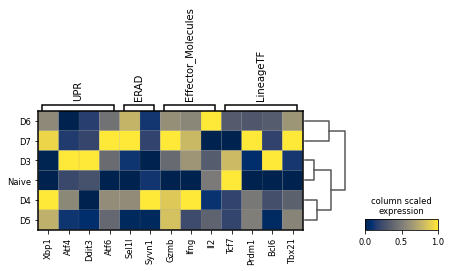

<Figure size 432x288 with 0 Axes>

In [7]:
sc.pl.matrixplot(Data, marker_genes_dict, 'Day_Infection', dendrogram=True, cmap='cividis', standard_scale='var', colorbar_title='column scaled\nexpression')
plt.savefig("/home/lcorrea/Projects/Kurd_GEO/figures/Matix_pathways_D8.tiff")


The above plot is nice in exploring interesting genes in the context of relative ot the other where is it hihgest but it might be a bit misleading. The dot plot bellow highlights how it can be misleading. Thouhg there appear to be changes in Sel1L throuhg differentiation, It becomes apperant that very few cells are expressing Sel1L at detectable levels. In contranst, Gzmb as expected increases over time and the proportion of cells expresisng it increases significnatly. 

categories: D3, D4, D5, etc.
var_group_labels: UPR, ERAD, Effector_Molecules, etc.


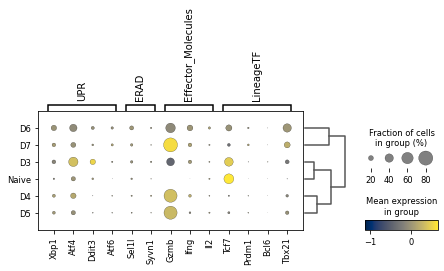

In [8]:
sc.pl.dotplot(Data, marker_genes_dict, 'Day_Infection', cmap="cividis",dendrogram=True)

In [9]:
plt.savefig("/home/lcorrea/Projects/Kurd_GEO/figures/Dot_pathways_D8.tiff")

<Figure size 432x288 with 0 Axes>